# Parallel Computing (IT306)

- Jim M John (al.john.it@nitk.edu.in)

## Aim

- Make you think parallel


## Course Outline

- Parallel Programming vs Concurrent Programming
- Data Parallelism vs Task Parallelism
- 

## Application Programming Interfaces
- Message-Passing Interface or MPI
- POSIX threads or Pthreads
- OpenMP
- CUDA

### Is it needed?

- Processor speed increased at a faster pace during 1986 to 2003. But after that it is increasing at very less pace.
- Traditional processors have high latency and low throughput. 
- CPUs try to optimize latency but GPUs focuses on throughput.
- In some applications we care more about throughput. Like computer graphics, where importance is given to pixels produced per second than the one individual pixel produced.
- At the begining of 21$^{st}$ centuary processor frequancy scalling hit the power wall.

#### Issues
 - Separating sequential computations into parallel subcomputations can be challenging, or even impossible.
 - Ensuring program correctness is more difficult, due to new type of errors.
 
 Speedup is the only reason why we bother paying for this complexity.


#### Suppose you want to add n numbers and your system has p cores and you want to use all the p cores. 

- if p$\leq$n, then each core  can form a partial sum of approximately n/p values



In [1]:
import time
import multiprocessing

def sum_chunk(numbers):
  return sum(numbers)

def sequential_sum(numbers):
  total = 0
  for num in numbers:
    total += num
  return total

def main(numbers, p):
  # Sequential sum
  start_time = time.time()
  sequential_result = sequential_sum(numbers)
  sequential_time = time.time() - start_time

  # Parallel sum
  start_time = time.time()
  #chunk_size = len(numbers) // p
  chunk_size = 3
  chunks = [numbers[i*chunk_size:(i+1)*chunk_size] for i in range(p)]
  #print(chunks)
  with multiprocessing.Pool(processes=p) as pool:
    partial_sums = pool.map(sum_chunk, chunks)
  
  parallel_result = sum(partial_sums)
  parallel_time = time.time() - start_time

  return sequential_result, sequential_time, parallel_result, parallel_time

if __name__ == "__main__":
  numbers = list(range(100000))
  p = 8
  sequential_result, sequential_time, parallel_result, parallel_time = main(numbers, p)

  print("Sequential result:", sequential_result, "time:", sequential_time)
  print("Parallel result:", parallel_result, "time:", parallel_time)


Sequential result: 4999950000 time: 0.0025398731231689453
Parallel result: 276 time: 0.14219975471496582


##### Try reducing the list size and explain the anomaly
- Creating processes, distributing data, and collecting results incurs overhead.
- For small datasets, this overhead can outweigh the benefits of parallelism.

# Assignment 1 

- Modify the above code to add the chunk list to also to add in parallel to arrive at the result faster. If its not working faster, state the reason. Use the following logic

<div>
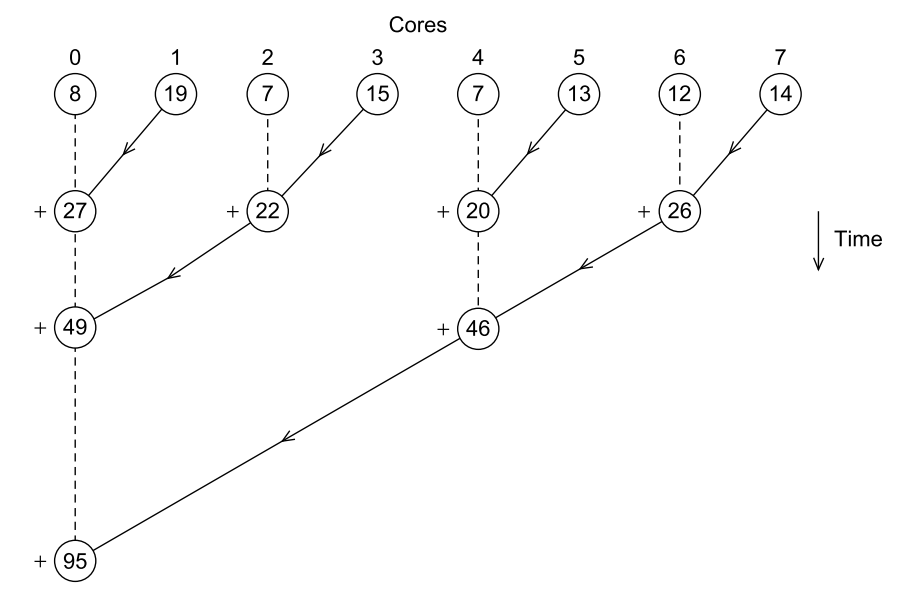
</div>


## Parallel Programming vs Concurrent Programming

- Understand the difference clearly
- Concurrency - A condition of a system in which multiple tasks are logically active at one time.
- Parallelism - A condition of a system in which multiple tasks are actually active at one time.

### Concurrent but not parallel

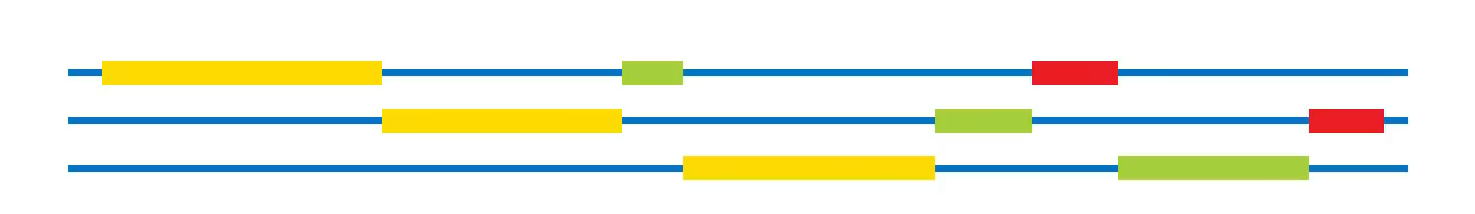

### Concurrent and parallel

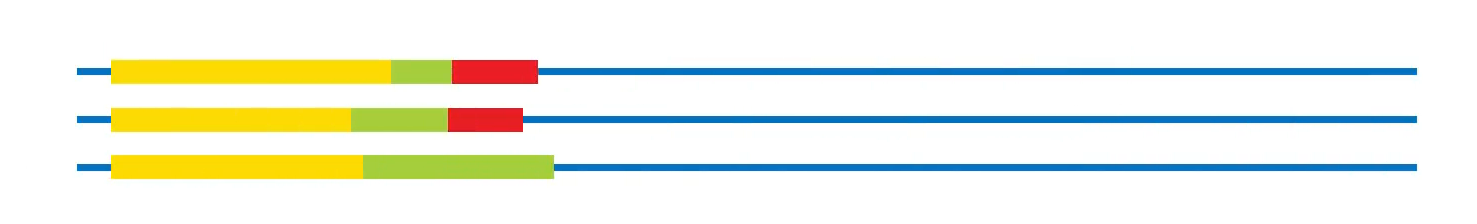

### So --- !
<div>
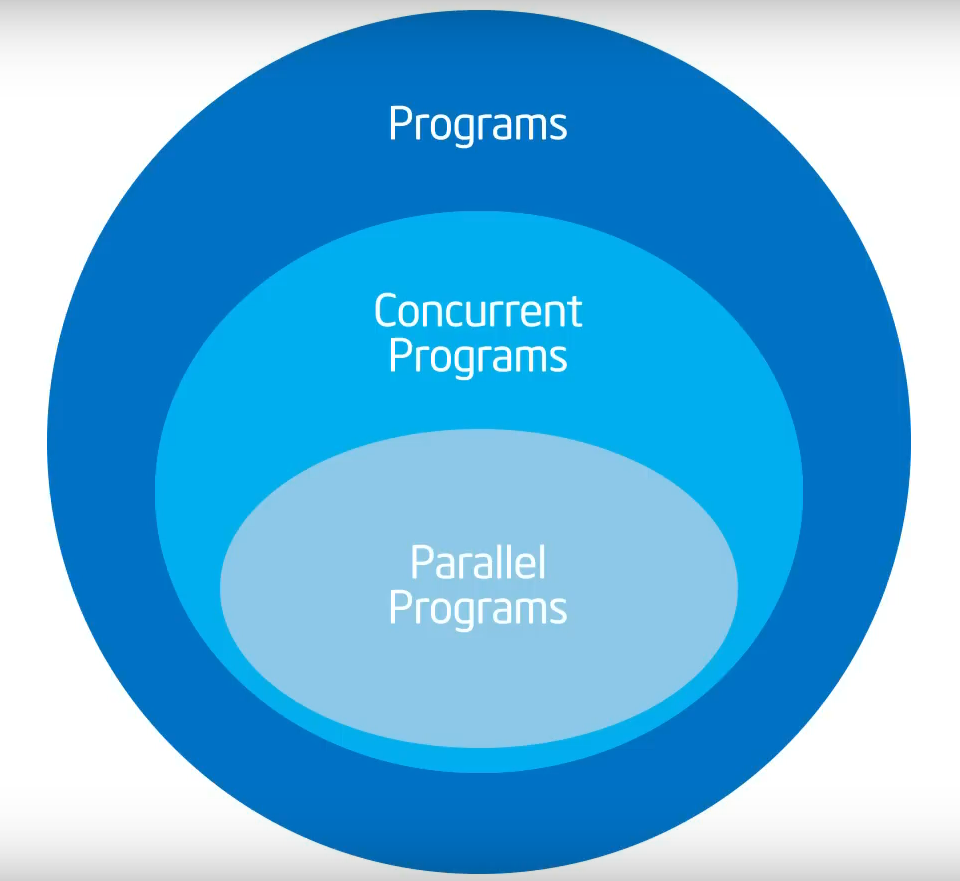
</div>

<br>

Application of concurrent programming - Web Server

There is no compiler that makes sequential code parallel. 


# OpenMP

### Process
- A process is an instance of a computer program that is being executed. It contains the program code and its current activity.

### Thread
- A thread of execution is the smallest unit of processing that can be scheduled by an operating system.
<br> <br>
A thread is contained inside a process. Multiple threads can exist within the same process and share resources such as memory. The threads of a process share the latter’s instructions (code) and its context (values that its variables reference at any given moment). Different processes do not share these resources.

### How OpenMP works

Shared memory, thread-based parallelism, the Programmer has to specify parallelization(no automation), Compiler directive-based

<br>
OpenMP is not 

- Meant for distributed-memory parallel systems (it is designed for shared address spaced machines)
- Guaranteed to make the most efficient use of shared memory
- Required to check for data dependencies, data conflicts, race conditions, or deadlocks
- Required to check for code sequences
- Meant to cover compiler-generated automatic parallelization and directives to the compiler to assist such parallelization

Its based on Fork - Join Parallelism

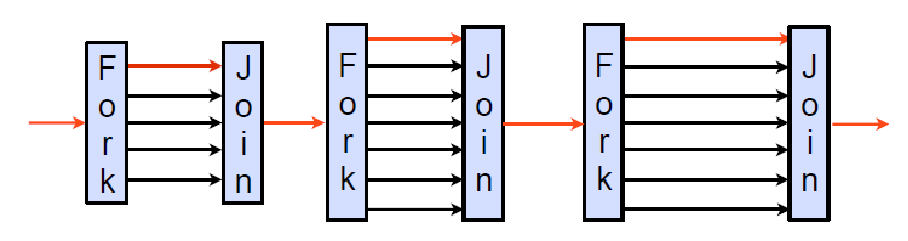





In [ ]:
Write this small code

#include <stdio.h>
#include <omp.h>

int main(int argc, char** argv){
    #pragma omp parallel
    {
        printf(“Hello from process: %d\n”, omp_get_thread_num());
    }
    return 0;
}

Set this environment variable before running.

export OMP_NUM_THREADS=4


### Private vs. Shared Variables

- Private types create a copy of a variable for each process in the parallel system.
- Shared types hold one instance of a variable for all processes to share.

To indicate private or shared memory, declare the variable before your parallel section and annotate the pragma omp directive as such:



#pragma omp shared(shar_Var1) private(priv_Var1, priv_Var2)

In [ ]:
#include <stdio.h>
#include <omp.h>

int main(int argc, char** argv){
    int thread_id=100;

    #pragma omp parallel private(thread_id)
    {
        thread_id++;
        printf("Hello from process: %d\n", thread_id );
    }

    return 0;
}


#Here Separate instances of thread_id for each task

### Calculating value of Pi

In [ ]:
#include <stdio.h>
#include <omp.h>
#include<iostream>

using namespace std;

static long num_steps = 100000;
double step;
int main() {
 double x, pi, sum=0.0;
 step = 1.0/(double)num_steps;
 for(int i=0; i<num_steps; i++) {
  x = (i+0.5)*step;
  sum += 4.0/(1.0+x*x);
 }
 pi = step*sum;
 cout<<"Pi="<<pi<<endl;
}


#### Calculate using OpenMP

In [ ]:
#include <stdio.h>
#include <omp.h>
#include<iostream>
using namespace std;

#define NUM_THREADS 1

static long num_steps = 100000;
double step;

int main() {
 int i, nthreads;
 double pi, sum[NUM_THREADS];
 step = 1.0/(double)num_steps;
 omp_set_num_threads(NUM_THREADS);
 #pragma omp parallel
 {
   int i, id, nthrds;
   double x;
   id = omp_get_thread_num();
   nthrds = omp_get_num_threads();
   if(id==0) nthreads = nthrds;
   for(i=id,sum[id]=0.0;i<num_steps; i=i+nthrds) {
     x = (i+0.5)*step;
     sum[id] += 4.0/(1.0+x*x);
   }
 }
 for(i=0, pi=0.0; i<nthreads;i++) pi += step*sum[i];
 cout<<"\nPi="<<pi<<endl;
}


/*
Take away

Here you can see the cyclic distribution of the loop iteration.
 - The sum variable has to be shared. Otherwise once the thread is finished, the values it calculated will be lost.
 - Why you had to use different sum variable for each thread.
 - Use of declaring nthreads outside - Because eventhough you request the number of threads, the environment can give you different number of threads.

*/

### False Sharing
The sum[] array will be sitting in the same cache line. 

<div>
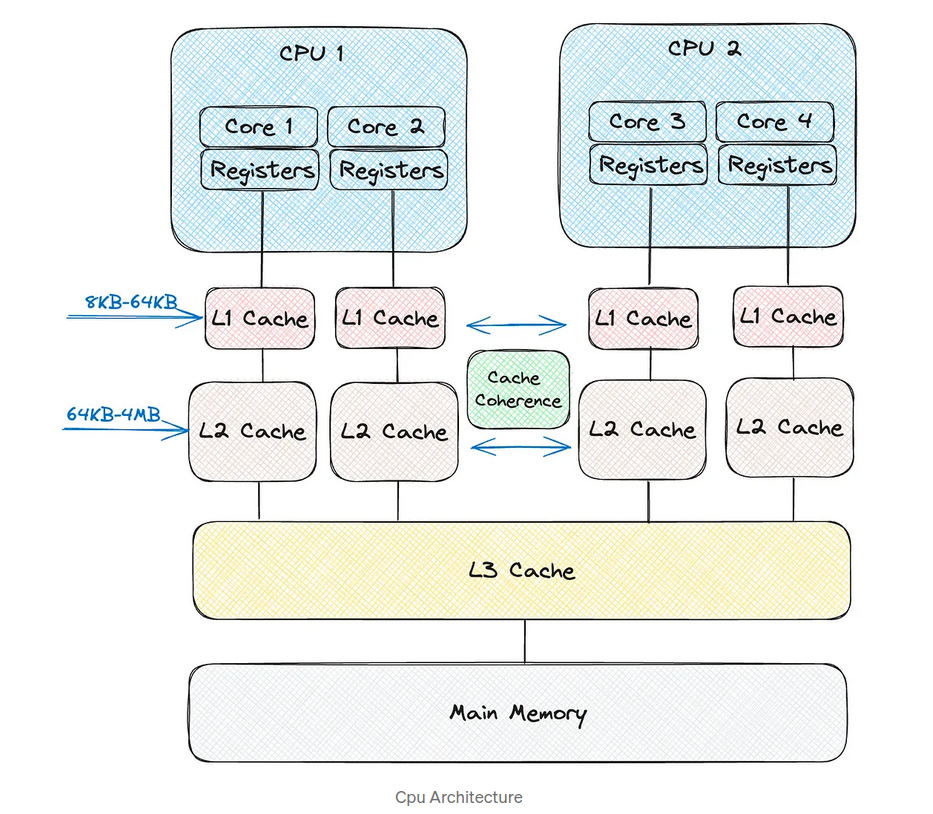
</div>

When CPU is reading data from main memory or from cache levels, it doesn’t read a single byte but instead reads a block of bytes, usually 64 bytes. We call this block of bytes as cache lines. Cache lines most probably store more than one variable since it consists of multiple bytes.

<br>

 In case different CPUs need to work on variables shared on the same cache line then it will create cache thrashing and will cause false sharing.

 <br>

 Suppose we have two variables X and Y variable in the same cache line, and thread 1 updates X and thread 2 does only want to operate on Y. However both thread has the cache line that holds X and Y, since we read 64 bytes block of memory. In that case thread 2 told to invalidate its cache because of the change in variable X which thread 2 is not interested in. This situation is called false sharing.

<br>

Do the following modifications to the code and plot the scalability




In [ ]:
#include <stdio.h>
#include <omp.h>

#include<iostream>
using namespace std;

#define NUM_THREADS 2

static long num_steps = 100000;

#define PAD 8 //L1 cache line is 64 byte, double is 8 byte

double step;
int main() {
 int i,nthreads;
 double x, pi, sum[NUM_THREADS][PAD];
 step = 1.0/(double)num_steps;
 omp_set_num_threads(NUM_THREADS);
 #pragma omp parallel
 {
   int i, id, nthrds;
   double x;
   id = omp_get_thread_num();
   nthrds = omp_get_num_threads();
   if(id==0) nthreads = nthrds;
   for(i=id,sum[id][0]=0.0;i<num_steps; i=i+nthrds) {
     x = (i+0.5)*step;
     sum[id][0] += 4.0/(1.0+x*x);
   }
 }
 for(i=0, pi=0.0; i<nthreads;i++)pi += step*sum[i][0];
 cout<<"\nPi="<<pi<<endl;
}


### Assignment 1 -
 - Check the time it took to run for 1, 2, 3, 4, ..., 8.
 - Plot the scalability

## Synchronization



### Barrier and Critical Directives

It manages processes. The barrier directive stops all processes from proceeding to the next line of code until all processes have reached the barrier. This allows a programmer to synchronize sequences in the parallel process. A critical directive ensures that a line of code is only run by one process at a time, ensuring thread safety in the body of code.



In [ ]:
#pragma omp barrier

#pragma omp critical { … }

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <omp.h>

/**
 * @brief Illustrates the OpenMP barrier synchronisation.
 * @details This application is made of a parallel region, in which two distinct
 * parts are to be executed, separated with a barrier. In each part, threads
 * have to print a message. They will print their second message only when all
 * threads will have printed the first one.
 **/
int main(int argc, char* argv[])
{
	// Use 4 threads when we create a parallel region
	omp_set_num_threads(4);

	// Create the parallel region
	#pragma omp parallel
	{
		// Threads print their first message
		printf("[Thread %d] I print my first message.\n", omp_get_thread_num());

		// Make sure all threads have printed their first message before moving on.
		#pragma omp barrier

		// One thread indicates that the barrier is complete.
		#pragma omp single
		{
			printf("The barrier is complete, which means all threads have printed their first message.\n");
		}

		// Threads print their second message
		printf("[Thread %d] I print my second message.\n", omp_get_thread_num());
	}

	return EXIT_SUCCESS;
}


In [ ]:
//critical -> Run code segment one by one by all threads

#include <iostream>
#include <stdio.h>
#include <omp.h>

int main() {
  // shared variable
    int sum_shared = 0;
    #pragma omp parallel
    {
        // private varia~ble
        int sum_local = 0;
        //#pragma omp for nowait
        for (int i = 0; i < 10; ++i) {
            sum_local += i;
        }
        // critical section as we update
        // shared variable/ data
        //std::cout<<"Thread ID   = "<<omp_get_thread_num()<<std::endl;
        printf("Thread ID =  %d\n", omp_get_thread_num());
        #pragma omp critical
        {
            sum_shared += sum_local;
        }
    }
    std::cout << sum_shared << std::endl;
  return 0;
}


### Assignment 2 - 

Use the synchroniztion constructs to have the same performance in calculating the value of pi similar to the code where we pad the sum variable

## "for" construct


In [ ]:
#pragma omp parallel
 {
    int i, id, nthreads, start, stop;
    id = omp_get_thread_num();
    nthreads = omp_get_num_threads();
    start = id * N / nthreads;
    stop = (id+1)*N/nthreads;
    if(id==nthreads-1) stop = N;
    for(i=start; i<stop;i++){a[i] = a[i] + b[i];}
 }
 

<br>This code can be written as following with the "for" construct<br>

In [ ]:
#pragma omp parallel
#pragma omp for
   for(i=0; i<N;i++){a[i] = a[i] + b[i];}

### Loop carried dependency



In [ ]:
int j=10;
#pragma omp parallel for
for(i=0; i<N;i++){
    j= j+3;
    a[i] = a[i] + b[j];
}

<br>
The above code will not work, since inside the loop, j is dependent on the previous iteration. Remove this by linking to i
<br>


In [ ]:
#pragma omp parallel for
for(i=0; i<N;i++){
    int j= 10+3*(i+1);
    a[i] = a[i] + b[j];
}

### Reduction

The reduction clauses are data-sharing attribute clauses that can be used to perform some forms of recurrence calculations in parallel.
<br>
A reduction-identifier is either an identifier or one of the following operators: +, -, *, &, |, ^, && and ||.

<br>

In [ ]:
#include <omp.h>
#include <stdio.h>
#include <stdlib.h>

int main (int argc, char *argv[]) 
{
int   i, n;
float a[100], b[100], sum; 

/* Some initializations */
n = 100;
for (i=0; i < n; i++)
  a[i] = b[i] = i * 1.0;
sum = 0.0;

#pragma omp parallel for reduction(+:sum)
  for (i=0; i < n; i++)
    sum = sum + (a[i] * b[i]);

printf("   Sum = %f\n",sum);

}


// What reduction does
// - A local copy of each variable for the identifier is made and initialized the 
    shared variable by the identity for the identifier
    

### Assignment 3 -

Write a program to multiply two matrices and include the idea of "for" construct.

### Assignment 4 - 

Include the reduction construct for the pi program.


## Some points that you might have missed

- Thread is a process of a code is being executed. A thread of
execution is the smallest unit of processing.
- Multiple threads can exist within the same process and share
resources such as memory.
- Types of parallelism.
  - Bit Level parallelism -  8 bit processor calculating the addition of two 16 bit integers - takes time, so 16 bit processors are introduced
  - Instruction-level parallelism
  - Task Parallelism
  - Data-level parallelism


## Flynn‘s Classification

- Flynn's taxonomy is a specific classification of parallel computer architectures that
are based on the number of concurrent instructions (single or multiple) and data
streams (single or multiple) available in the architecture.
- The four categories in Flynn's taxonomy are the following:
  - (SISD) single instruction, single data
  - (SIMD) single instruction, multiple data
  - (MISD) multiple instruction, single data
  - (MIMD) multiple instruction, multiple data

## Vector Architectures

- A multithreaded CPU is not a parallel architecture, strictly speaking; multithreading is obtained through a single CPU, but it allows a programmer to design and develop applications as a set of programs that can virtually execute in parallel: namely,threads.
- Multithreading is solution to avoid waiting clock cycles as the missing data is fetched: making the CPU manage more peer-threads concurrently; if a thread gets blocked, the CPU can execute instructions of  another thread, thus keeping functional unitsbusy.
- Each thread must have a private Program Counter and a set of private registers, separate from otherthreads.
- In a vector architecture, there is support of a vector datatype, where a vector is a collection of VL n-bit words (VL is the vectorlength).
- There may also be a vector register file, which was a key innovation of the Cray architecture.


## Vector vs Array Processors

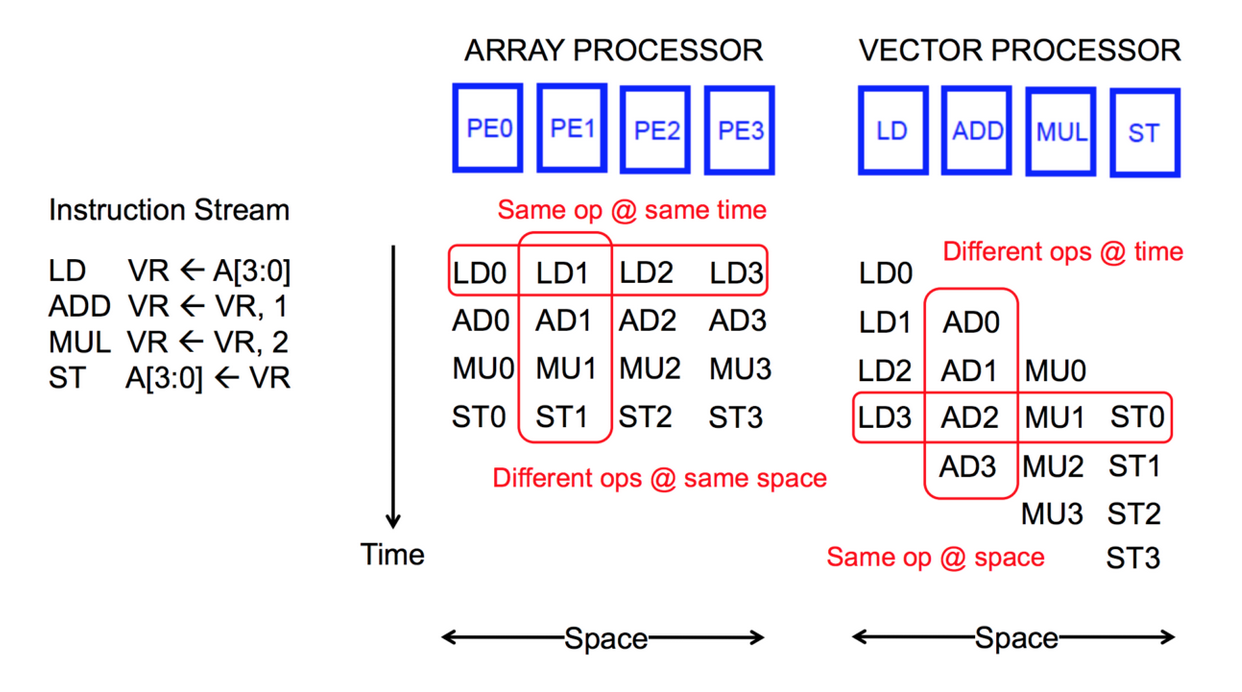

When the compiler is able to produce vector instructions for a block of code and the resulting code spends much of its time running in vector mode, the code is said to be vectorizable. Loops can be vectorized when they do not have dependencies between iterations of a loop, which are called loop-carried dependencies.

In an array processor, every ADD must wait for an LD, and every MUL must wait for the ADD. On the vector processor, each vector instruction will only stall for the first element in each vector, and then subsequent elements will flow smoothly down the pipeline. Thus, pipeline stalls are required only once per vector instruction, rather than once per vector element. This forwarding of element-dependent operations is called chaining.

Chaining allows a vector operation to start as soon as the individual elements of its vector source operand become available: The results from the first functional unit in the chain are forwarded to the second functional unit. Modern vector architectures use flexible chaining, which allows a vector instruction to chain to essentially any other active vector instruction, assuming that we don’t generate a structural hazard.

### Advantages of vector architecture
- No dependencies within a vector. Pipelining, parallelization work well. Can have very deep pipelines
- Each instruction generates a lot of work. This reduces instruction fetch bandwidth.
- Highly regular memory access pattern. Can interleave multiple memory banks for higher memory bandwidth. Prefetching.
- No need to explicitly code loops. Fewer branch instructions in the instruction sequence.

### Disadvantages of vector architectrue.
- Works (only) if parallelism is regular (data/SIMD parallelism). Very inefficient if parallelism is irregular.
- Memory bandwidth can easily become a bottleneck if
     - compute/memory operation balance is not maintained.
     - data is not mapped appropriately to memory banks.

## Cluster Computing

- High performance Cluster
- Load Balancing Cluster
- Web service Cluster
- Storage Cluster
- Database Cluster

In [ ]:





import cupy as cp
import numpy as np

# Create 2D numpy arrays
a = np.random.random(100000000)
a = a.reshape(10000,10000)

b = np.random.random(100000000)
b = b.reshape(10000,10000)

# Move to GPU
g = cp.asarray(a)
h = cp.asarray(b)

# Matrix Mult
out = cp.matmul(g,h)


print(out)

In [8]:
import os
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
import numpy as np
import pandas as pd
import glob
import math
from datetime import date
from functools import partial
import matplotlib.pyplot as plt
from matplotlib import colors
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': '16'})
import warnings; warnings.simplefilter('ignore')


In [9]:
# Define an array of numbers
foo = np.array([0, 1, 2, 3, 4, 5])

# Define a function that squares numbers
def bar(x):
    return x * x

# Loop over each element and perform an action on it
for element in foo:

        # Print the result of bar
        print(bar(element))


0
1
4
9
16
25


In [10]:
# (Very) inefficient way to define a map function
def my_map(function, array):
    # create a container for the results
    output = []

    # loop over each element
    for element in array:
        
        # add the intermediate result to the container
        output.append(function(element))
    
    # return the now-filled container
    return output


In [11]:
my_map(bar, foo)

[0, 1, 4, 9, 16, 25]

In [12]:
list(map(bar, foo))

# NB: in python3 `map` is a generator, so we need to cast it to a list for this comparison


[0, 1, 4, 9, 16, 25]

In [13]:
import multiprocessing

# Create a pool of processes
with multiprocessing.Pool(processes=6) as pool:
    # map the `np.square` function on our `foo` array
    result = pool.map(np.square, foo)

# output the results
print(result)


[0, 1, 4, 9, 16, 25]


In [14]:
def parallel_test(x):
    # print the index of the job and it's process ID number
    s = f"x = {x}, PID = {os.getpid()}"
    print(s)
    return s


In [15]:
list(map(parallel_test, foo));


x = 0, PID = 4330
x = 1, PID = 4330
x = 2, PID = 4330
x = 3, PID = 4330
x = 4, PID = 4330
x = 5, PID = 4330


In [16]:
with multiprocessing.Pool(processes=6) as pool:
    result = pool.map(parallel_test, foo)


x = 0, PID = 14833x = 1, PID = 14834x = 2, PID = 14835x = 4, PID = 14837x = 3, PID = 14836x = 5, PID = 14838







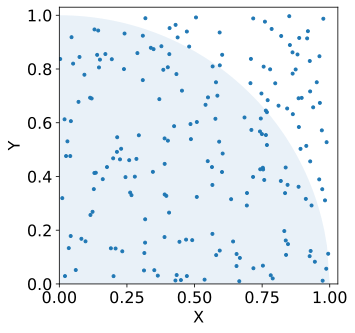

In [17]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(5,5))
x = np.linspace(0,1,100)
plt.fill_between(x, np.sqrt(1-x**2),0,alpha=0.1)
plt.xlim(0,1.03);plt.ylim(0,1.03);plt.xlabel('X');plt.ylabel('Y');

x = np.random.random(size=200)
y = np.random.random(size=200)

plt.plot(x,y,marker='.',linestyle='None');


In [18]:
def pi_mc(seed):
    num_trials = 500000
    counter = 0
    np.random.seed(seed)
    
    for j in range(num_trials):
        x_val = np.random.random_sample()
        y_val = np.random.random_sample()

        radius = x_val**2 + y_val**2

        if radius < 1:
            counter += 1
            
    return 4*counter/num_trials

In [19]:
%timeit pi_mc(1)

382 ms ± 5.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
seed_array = list(range(4))
%timeit list(map(pi_mc, seed_array))


1.59 s ± 54.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit

with multiprocessing.Pool(processes=4) as pool:
    result = pool.map(pi_mc, seed_array)



617 ms ± 26.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
